In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from collections import defaultdict
from sklearn.decomposition import PCA
from itertools import product

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score 
from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
df_train = pd.read_csv("./Train_NOoutliers")
df_train = df_train.drop(columns=['Unnamed: 0'], axis = 1)
df_train = df_train.drop(columns=['outlier_detection'], axis = 1)
df_test = pd.read_csv("./Test_ripulito (1)")
df_test = df_test.drop(columns=['Unnamed: 0'], axis = 1)

In [3]:
encoder= LabelEncoder()
encoder.fit(df_train["emotion"])

keys= encoder.classes_
values= encoder.transform(encoder.classes_)
dictionary = dict(zip(keys, values))

dictionary

{'angry': 0,
 'calm': 1,
 'disgust': 2,
 'fearful': 3,
 'happy': 4,
 'neutral': 5,
 'sad': 6,
 'surprised': 7}

In [4]:
df_train["emotion"]= encoder.transform(df_train["emotion"])
df_test["emotion"]= encoder.transform(df_test["emotion"])

In [5]:
y_train = df_train.emotion
df_train = df_train.drop("emotion", axis=1)
X_train = df_train.drop(columns=['vocal_channel', 'emotional_intensity', 'statement', 'repetition', 'sex', 'filename'], axis = 1)
y_test = df_test.emotion
df_test = df_test.drop("emotion", axis=1)
X_test = df_test.drop(columns=['vocal_channel', 'emotional_intensity', 'statement', 'repetition', 'sex', 'filename'], axis = 1)


In [6]:
df_train

,vocal_channel,emotional_intensity,statement,repetition,sex,filename,sum,std,q25,q50,...,sc_q25_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_std_w4,stft_min_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,speech,normal,Kids are talking by the door,1st,M,03-01-01-01-01-01-01.wav,0.145081,0.004001,-0.000031,0.0,...,10439.979745,25.150642,-4.175609,740.409892,0.791036,0.155455,0.000000,1.0,6.742190,-1.706215
1,speech,normal,Kids are talking by the door,2nd,M,03-01-01-01-01-02-01.wav,0.114319,0.004283,-0.000031,0.0,...,9721.736881,-0.096686,-1.100390,705.975006,0.744699,0.163183,0.270133,1.0,-0.700420,-0.201495
2,speech,normal,Dogs are sitting by the door,1st,M,03-01-01-01-02-01-01.wav,0.149963,0.005084,0.000000,0.0,...,9711.644575,16.082550,-3.120218,694.365924,0.751478,0.190634,0.000000,1.0,1.688986,-1.024773
3,speech,normal,Dogs are sitting by the door,2nd,M,03-01-01-01-02-02-01.wav,0.139618,0.004886,-0.000031,0.0,...,8998.702287,-0.332682,-0.880988,663.205667,0.736895,0.182551,0.205616,1.0,-0.594111,-0.412871
4,speech,normal,Kids are talking by the door,1st,M,03-01-02-01-01-01-01.wav,0.137665,0.002956,-0.000031,0.0,...,9178.275961,0.054656,-1.071109,741.412796,0.744390,0.177069,0.177847,1.0,0.126535,-0.620782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,speech,normal,Dogs are sitting by the door,2nd,F,03-01-08-01-02-02-18.wav,-0.154480,0.005399,0.000000,0.0,...,8504.050807,0.904699,-1.472070,660.790616,0.663444,0.294603,0.000000,1.0,0.262900,-1.051814
1805,speech,strong,Kids are talking by the door,1st,F,03-01-08-02-01-01-18.wav,-0.139679,0.008788,-0.000031,0.0,...,7511.014887,0.947101,-1.301303,634.120979,0.614458,0.323299,0.000000,1.0,-0.857759,-0.608583
1806,speech,strong,Kids are talking by the door,2nd,F,03-01-08-02-01-02-18.wav,-0.210968,0.009933,0.000000,0.0,...,7559.625245,2.505409,-1.472613,631.801688,0.634339,0.288322,0.000000,1.0,-0.656632,-0.586954
1807,speech,strong,Dogs are sitting by the door,1st,F,03-01-08-02-02-01-18.wav,-0.085876,0.012221,-0.000031,0.0,...,7603.873380,-0.020476,-1.160818,680.117724,0.622818,0.323022,0.000000,1.0,-0.499022,-0.849045


In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
params = {
    'criterion' : ["gini", "entropy", "log_loss"],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20]
}

clf = RandomForestClassifier()
grid_search = GridSearchCV(clf, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
clf = grid_search.best_estimator_

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

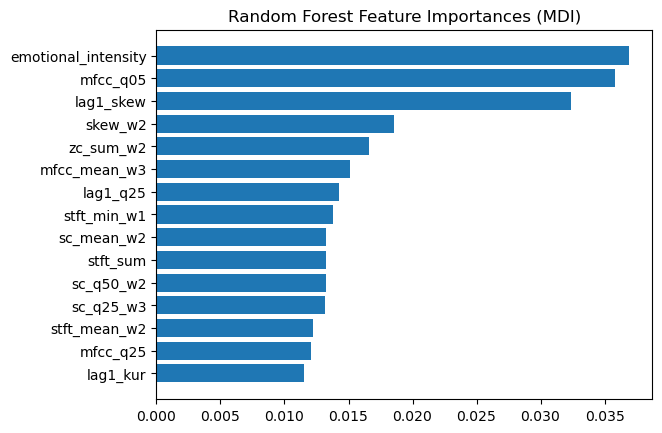

In [ ]:
nbr_features = 15

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(df_train.columns)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

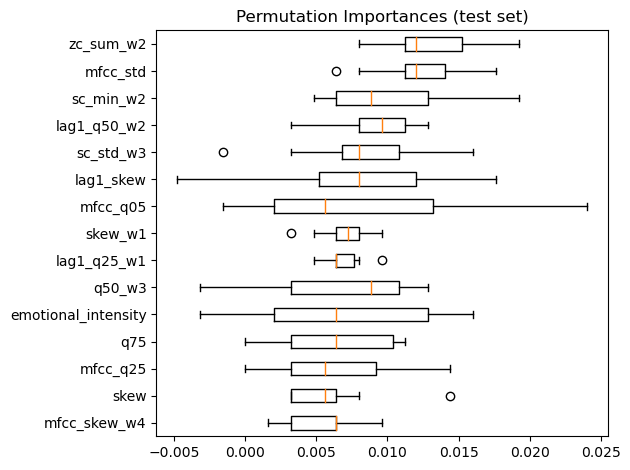

In [ ]:
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(df_train.columns)[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

In [75]:
from sklearn.tree import plot_tree

In [90]:
clf.estimators_[0]

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=10,
                       random_state=1818510686)

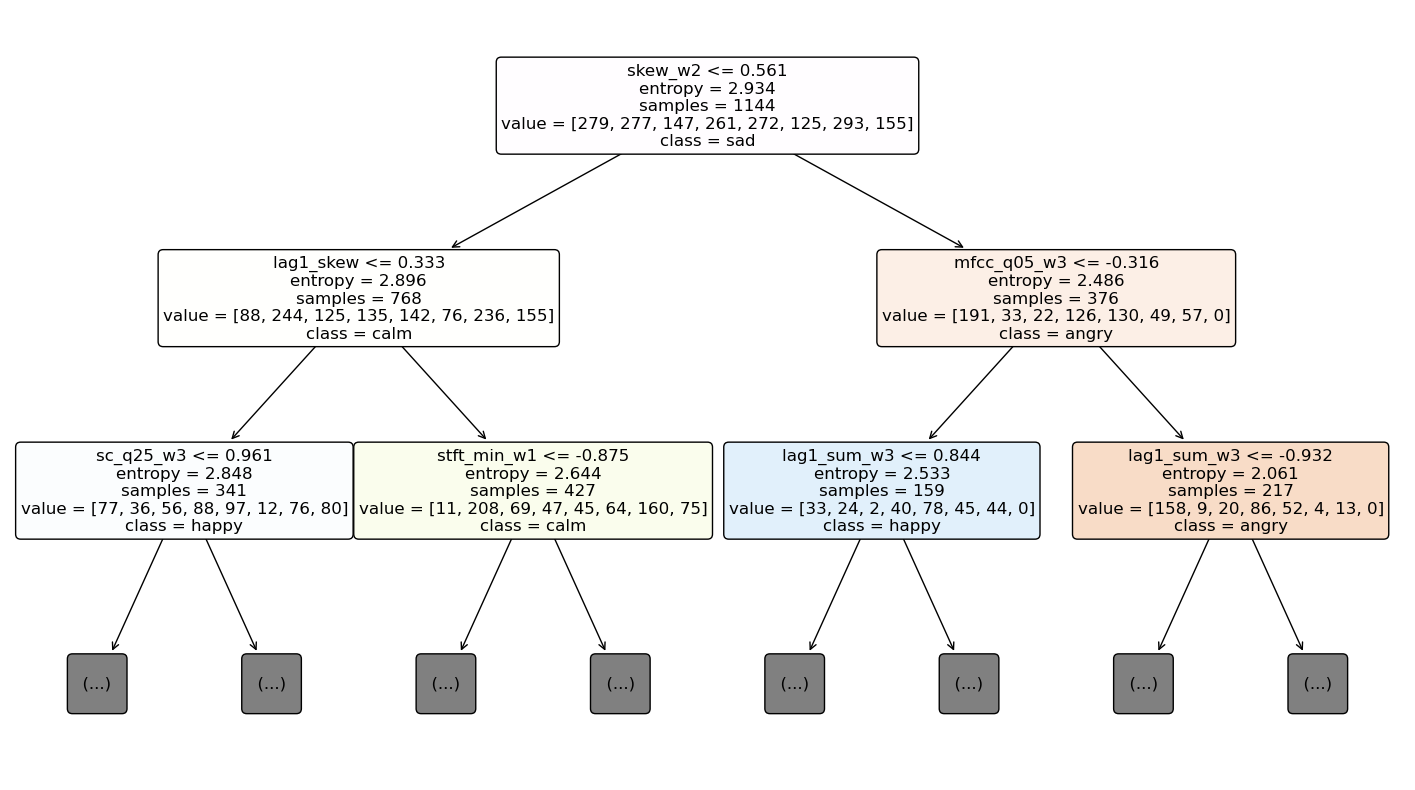

In [91]:
plt.figure(figsize=(18,10))
plot_tree(clf.estimators_[0], 
          feature_names=df_train.columns, 
          class_names=keys, 
          filled=True, 
          rounded=True,
          fontsize=12,
          max_depth=2)  
plt.show()

In [63]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

In [94]:
bag = BaggingClassifier(base_estimator=clf, n_estimators=100, 
                        random_state=0)
bag.fit(X_train, y_train)

y_pred =bag.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

c:\Users\Alex\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy 0.4358974358974359
F1-score [0.57489879 0.57264957 0.42857143 0.34532374 0.35643564 0.25396825
 0.27218935 0.45454545]
              precision    recall  f1-score   support

           0       0.47      0.74      0.57        96
           1       0.49      0.70      0.57        96
           2       0.50      0.38      0.43        48
           3       0.56      0.25      0.35        96
           4       0.34      0.38      0.36        96
           5       0.53      0.17      0.25        48
           6       0.32      0.24      0.27        96
           7       0.40      0.52      0.45        48

    accuracy                           0.44       624
   macro avg       0.45      0.42      0.41       624
weighted avg       0.44      0.44      0.41       624



In [65]:
from sklearn.ensemble import AdaBoostClassifier

In [95]:
ada = AdaBoostClassifier(base_estimator=clf, n_estimators=100, random_state=0)
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

c:\Users\Alex\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy 0.483974358974359
F1-score [0.6184739  0.5483871  0.51376147 0.37837838 0.42458101 0.35135135
 0.41414141 0.4952381 ]
              precision    recall  f1-score   support

           0       0.50      0.80      0.62        96
           1       0.57      0.53      0.55        96
           2       0.46      0.58      0.51        48
           3       0.54      0.29      0.38        96
           4       0.46      0.40      0.42        96
           5       0.50      0.27      0.35        48
           6       0.40      0.43      0.41        96
           7       0.46      0.54      0.50        48

    accuracy                           0.48       624
   macro avg       0.49      0.48      0.47       624
weighted avg       0.49      0.48      0.47       624



In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

params = {
    'learning_rate' : [0.1, 0.5, 1],
    'max_depth' : [3, 5, 7],
    'min_samples_split' : [10, 50, 100]
}

clf = GradientBoostingClassifier(n_estimators=100, random_state=0)
grid = RandomizedSearchCV(clf, params, scoring='accuracy')
grid.fit(X_train, y_train)
clf = grid.best_estimator_
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.72      0.63        96
           1       0.55      0.54      0.54        96
           2       0.60      0.44      0.51        48
           3       0.48      0.30      0.37        96
           4       0.33      0.49      0.39        96
           5       0.50      0.40      0.44        48
           6       0.29      0.28      0.29        96
           7       0.31      0.25      0.28        48

    accuracy                           0.44       624
   macro avg       0.45      0.43      0.43       624
weighted avg       0.45      0.44      0.44       624



In [46]:
from xgboost import XGBClassifier

In [104]:
params = {
    'learning_rate' : [0.1, 0.5, 1],
    'gamma' : [0.1, 0.5, 1],
    'tree_method' : ['exact', 'approx']
}

clf = XGBClassifier(objective='multi:softmax', 
                    num_class=8,
                    max_depth = 6,
                    reg_lambda = 1,
                    use_label_encoder=False,
                    random_state=42
                   )
grid = RandomizedSearchCV(clf, params, scoring= 'accuracy')
grid.fit(X_train, y_train)
clf = grid.best_estimator_
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

c:\Users\Alex\anaconda3\envs\myenv\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Alex\anaconda3\envs\myenv\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Alex\anaconda3\envs\myenv\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Alex\anaconda3\envs\myenv\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\Alex\anaconda3\envs\myenv\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\A

Accuracy 0.44711538461538464
F1-score [0.60655738 0.56684492 0.5        0.36601307 0.32835821 0.38356164
 0.34170854 0.4       ]
              precision    recall  f1-score   support

           0       0.50      0.77      0.61        96
           1       0.58      0.55      0.57        96
           2       0.50      0.50      0.50        48
           3       0.49      0.29      0.37        96
           4       0.31      0.34      0.33        96
           5       0.56      0.29      0.38        48
           6       0.33      0.35      0.34        96
           7       0.40      0.40      0.40        48

    accuracy                           0.45       624
   macro avg       0.46      0.44      0.44       624
weighted avg       0.45      0.45      0.44       624



In [48]:
#!pip install lightgbm
from lightgbm import LGBMClassifier

In [105]:
params = {
    'boosting_type' : ['gbdt', 'goss', 'dart'],
    'reg_alpha' : [0.001, 0.01, 0.1, 0],
    'reg_lambda' : [0.001, 0.01, 0.1, 0]
}

clf = LGBMClassifier(boosting_type='gbdt',  #'goss', #'dart'
                     max_depth=-1, # no limit
                     num_leaves=31,
                     n_estimators=100,
                     subsample_for_bin=200000,
                     objective='multiclass',
                     reg_alpha=0.0, #L1 regularization term on weights
                     reg_lambda=0.0, #L2 regularization term on weights
                     random_state=42
                   )
grid = RandomizedSearchCV(clf, params, scoring= 'accuracy')
grid.fit(X_train, y_train)
clf = grid.best_estimator_

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.46634615384615385
F1-score [0.625      0.52910053 0.4893617  0.41463415 0.42105263 0.45333333
 0.32978723 0.38202247]
              precision    recall  f1-score   support

           0       0.52      0.78      0.62        96
           1       0.54      0.52      0.53        96
           2       0.50      0.48      0.49        48
           3       0.50      0.35      0.41        96
           4       0.39      0.46      0.42        96
           5       0.63      0.35      0.45        48
           6       0.34      0.32      0.33        96
           7       0.41      0.35      0.38        48

    accuracy                           0.47       624
   macro avg       0.48      0.45      0.46       624
weighted avg       0.47      0.47      0.46       624



In [50]:
#!pip install catboost
from catboost import CatBoostClassifier

In [51]:
clf = CatBoostClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Learning rate set to 0.081555
0:	learn: 2.0409355	total: 162ms	remaining: 2m 41s
1:	learn: 2.0016775	total: 294ms	remaining: 2m 26s
2:	learn: 1.9657848	total: 421ms	remaining: 2m 19s
3:	learn: 1.9296681	total: 610ms	remaining: 2m 31s
4:	learn: 1.8968910	total: 763ms	remaining: 2m 31s
5:	learn: 1.8616769	total: 900ms	remaining: 2m 29s
6:	learn: 1.8282566	total: 1.03s	remaining: 2m 26s
7:	learn: 1.7980978	total: 1.15s	remaining: 2m 22s
8:	learn: 1.7685438	total: 1.27s	remaining: 2m 19s
9:	learn: 1.7432474	total: 1.4s	remaining: 2m 18s
10:	learn: 1.7173874	total: 1.53s	remaining: 2m 17s
11:	learn: 1.7000986	total: 1.66s	remaining: 2m 16s
12:	learn: 1.6847723	total: 1.78s	remaining: 2m 15s
13:	learn: 1.6637836	total: 1.9s	remaining: 2m 13s
14:	learn: 1.6434149	total: 2.02s	remaining: 2m 12s
15:	learn: 1.6194508	total: 2.16s	remaining: 2m 12s
16:	learn: 1.5991024	total: 2.28s	remaining: 2m 11s
17:	learn: 1.5789839	total: 2.4s	remaining: 2m 11s
18:	learn: 1.5660768	total: 2.52s	remaining: 2m